# Desenvolvimento de Modelos

A nossa pergunta inicial era: Podemos prever atrasos na chegada de um voo?

Um modelo pode ser visto como uma equação matemática usada para prever um valor dado um ou mais outros valores. Ele relaciona uma ou mais variáveis independentes a variáveis dependentes.

## Table of Contents

*   [1. Carregando Biblioteca e Dataset](#cell1)
*   [2. Regressão Linear Simples](#cell2)
*   [3. Regressão Linear Múltipla](#cell3)
*   [4. Gráfico de Regressão](#poly_reg)
*   [5. Erro quadrático médio e coeficiente de determinação](#assess)
*   [6. Tomada de decisão](#assess)

### Carregando Biblioteca e Dataset

Vamos primeiramente carregar os dados e ferramentas que precisamos.

In [1]:
# Carrega tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


A empresa IBM, mantém em seu site uma série de conjunto de dados. Nesse caso usaremos o <a href="https://developer.ibm.com/exchanges/data/all/airline/">Airline Dataset</a> que contém dados de mais de 200 milhões de voos domésticos feitos em território americano, coletados pelo Departamento de Estatísticas de Transporte dos Estados Unidos. Por questões didáticas usaremos a amostra desses dados e não o arquivo inteiro.

<ul>
    <li>data source: <a href="https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz" target="_blank">https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz</a></li>
    <li>data type: csv</li>
</ul>

In [2]:
# url onde os dados estão localizados
# url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# download do arquivo
#download.file(url, destfile = "lax_to_jfk.tar.gz")

# extrair arquivo 
# remova tar = "internal se estiver rodando este programa localmente" 
# untar("lax_to_jfk.tar.gz", tar = "internal")

# Lemos o arquivo csv => read_csv (Se for de um formato diferente use a função apropriada, verifique a documentação de readr)
companhias_aereas <- read_csv("dados/losAngeles_para_novaYork.csv",
                     col_types = cols(
                      'DivDistance' = col_number(),
                      'DivArrDelay' = col_number()
                      ))

### Regressão Linear Simples

Refere-se a uma variável independente para fazer uma predição. É usada para entender a relação entre duas variáveis.

<ul>
    <li> $X$: Variável independente</li>
    <li> $Y$: A resposta/variavel dependente (o que queremos prever)</li>
</ul>

**Função Linear**

$$
\hat{Y} = b\_0 + b\_1  X
$$

<ul>
    <li>$b_0$ o valor de Y quando X é 0 </li>
    <li>$b_1$ coeficiente angular da equação</li>
    <li>$\hat{Y}$ (y-hat) o valor previsto pelo modelo</li>
</ul>

Ao lidarmos com esse modelo fazemos quatro suposições:

<ol>
    <li>Linearidade: A relação entre X e a média de Y é linear</li>
    <li> Independência: Observações são independentes umas das outras</li>
    <li> Homocedasticidade: uma sequência de variáveis aleatórias é homocedástica se todas as suas variáveis aleatórias tiverem a mesma variância finita.
    <li> Normalidade: Para qualquer valor fixo de X, Y é normalmente distribuído</li>
</ol>

Vamos criar um modelo.
Primeiro iremos olhar apenas para os dados da companhia aerea Alaska Airline(AA). Também removeremos os valores NA de CarrierDelay(Atrasos causados pela companhia), já que usaremos essa variável depois.

In [3]:
# Definimos um dataset com apenas AA de companhia aerea

alaska <- companhias_aereas %>%
  filter(CarrierDelay != "NA", Reporting_Airline == "AA")

# Mostra os primeiros 6 valores do meu dataset
head(alaska)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,4,2006-06-01,AA,LAX,JFK,1515,2332,1507,2353,⋯,21,0,0,21,0,0,-8,0,NA,NA
6,5,2013-06-28,AA,LAX,JFK,1200,2045,1328,2220,⋯,95,5,0,7,0,83,88,88,NA,NA
10,3,2005-10-12,AA,LAX,JFK,0930,1755,0958,1823,⋯,28,0,0,28,0,0,28,28,NA,NA
4,6,2011-04-23,AA,LAX,JFK,0925,1800,1040,1850,⋯,50,0,0,50,0,0,75,75,NA,NA
8,7,2011-08-14,AA,LAX,JFK,1100,1945,1200,2042,⋯,57,0,0,57,0,0,60,60,NA,NA
2,5,2004-02-06,AA,LAX,JFK,1500,2306,1607,2348,⋯,42,0,0,0,0,42,67,67,NA,NA


Nesse exemplo, queremos saber como atrasos na partida (DepDelayMinutes) pode nos ajudar a prever atrasos na chegada (ArrDelayMinutes). Nesse caso, DepDelayMinutes é a variável independente X e ArrDelayMinutes é a nossa variável dependente Y. Usamos a função `lm()` para criar um modelo linear.

In [4]:
# Criamos o modelo
modelo_linear <- lm(ArrDelayMinutes ~ DepDelayMinutes, data = alaska)

# Resumimos o modelo
# b0(Intercept) = 17.35
# b1 = 0.7523
summary(modelo_linear)


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes, data = alaska)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.234 -12.716  -1.354   7.747  93.646 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      17.3544     2.5084   6.919  2.9e-10 ***
DepDelayMinutes   0.7523     0.0399  18.855  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.03 on 113 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7567 
F-statistic: 355.5 on 1 and 113 DF,  p-value: < 2.2e-16


In [5]:
# Podemos verificar os coeficientes b0 e b1 usando isso:
modelo_linear$coefficients

(Intercept) DepDelayMinutes 
     17.3544286       0.7522769

A equação que obtemos para esse modelo é:


$$ ArrDelayMinutes = 17.35 + 0.7523 * DepDelayMinutes $$

In [6]:
# Criando novos dados
novos_atrasos <- data.frame(
  DepDelayMinutes = c(12, 19, 24))

# Predição
pred <- predict(modelo_linear, newdata = novos_atrasos, interval = "confidence")
pred

,fit,lwr,upr
1,26.38175,21.98838,30.77512
2,31.64769,27.52630,35.76908
3,35.40907,31.44593,39.37222


A coluna fit no dataset `pred` mostra valores previstos com base nos inseridos. As colunas lwr e upr, mostram as margens de erro para cima e para baixo.

### Regressão Linear Múltipla

Diferente da Regressão Linear Simples, a múltipla refere-se a várias variáveis independentes para fazer uma predição. Explica a relação entre uma variável (Y) e duas ou mais variáveis (X).

**Equação**

$$
\hat{Y} = b\_0 + b\_1 X\_1 + b\_2 X\_2
$$


*   $b\_0$: o valor de Y quando X é 0
*   $b\_1$: coeficiente da variável 1
*   $b\_2$: coeficiente da variável 2

Seguindo o exemplo anterior, podemos usar as variáveis independentes DepDelayMinutes(Atraso em minutos da partida) e LateAircraftDelay(Atraso causado por outro avião)

In [7]:
regressao_multipla <- lm(ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay, data = alaska)

summary(regressao_multipla)


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay, 
    data = alaska)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.188 -12.545  -1.317   7.791  93.683 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       17.31707    2.53786   6.823 4.78e-10 ***
DepDelayMinutes    0.75556    0.04822  15.668  < 2e-16 ***
LateAircraftDelay -0.01028    0.08407  -0.122    0.903    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.11 on 112 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7545 
F-statistic: 176.2 on 2 and 112 DF,  p-value: < 2.2e-16


In [8]:
regressao_multipla$coefficients

(Intercept)   DepDelayMinutes LateAircraftDelay 
      17.31706644        0.75555543       -0.01027513

A equação que obtemos para esse modelo é:


$$ ArrDelayMinutes = 17.32 + 0.7556 * DepDelayMinutes - 0.0103 *  LateAircraftDelay $$

Podemos agora fazer previsões com novos valores

In [9]:
DepDelayMinutes <- c(10, 20, 30)
LateAircraftDelay <- c(20, 60, 30)

novos_dados <- data.frame(DepDelayMinutes, LateAircraftDelay)

In [10]:
pred <- predict(regressao_multipla, 
        newdata = novos_dados, 
        interval = "confidence")  
pred

# Quando DepDelayMinutes é 10 minutos e LateAircraftDelay é 20 minutos, ArrDelayMinutes é 49.98902 minutos

,fit,lwr,upr
1,24.66712,19.02312,30.31112
2,31.81167,21.42849,42.19485
3,39.67548,34.12732,45.22364


### Gráfico de Regressão

Fornecem uma boa estimativa:
<ol>
    <li>Relação entre duas variáveis</li>
    <li>A 'força' de uma correlação</li>
    <li>A direção da relação(positiva ou negativa)</li>
</ol>

São uma combinação de gráficos de dispersão, onde cada ponto representa um Y diferente, e a linha de regressão (ŷ)

`geom_smooth()` using formula 'y ~ x'


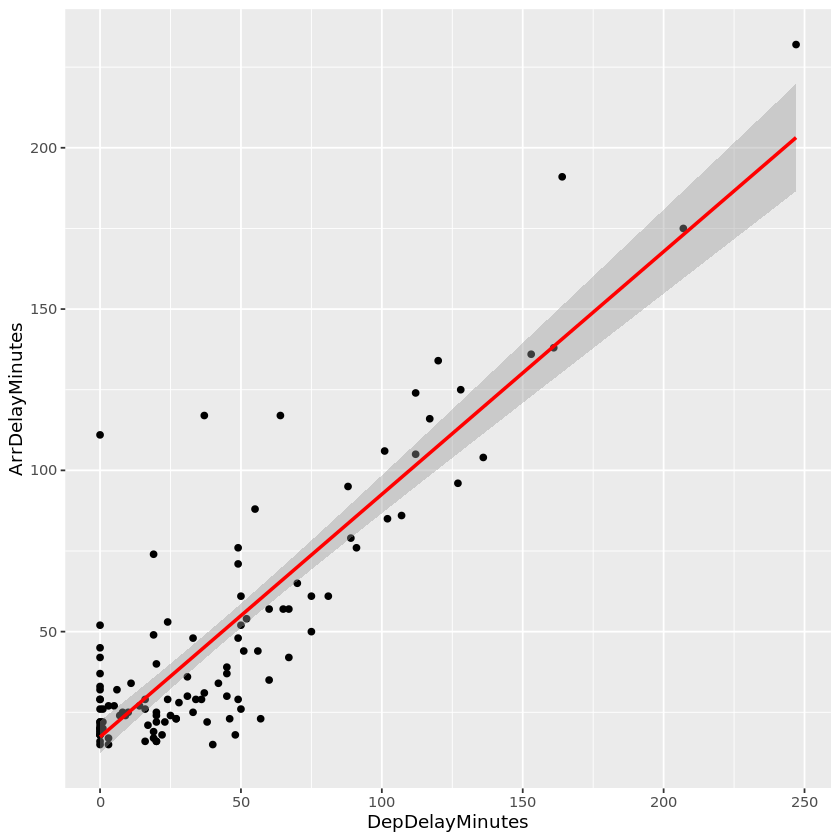

In [13]:
# Carregamos a biblioteca ggplot2
library(ggplot2)
# x contém a coluna com a variável independente e y contém a dependente. Estamos usando o dataframe Alaska
# Nele temos apenas dados da companhia Alaska
# A função geom_point() cria um gráfico de dispersão
# A função stat_smooth cria a linha vermelha juntamente com a área cinza que mostra as margens de erro
ggplot(alaska, aes(x = DepDelayMinutes, y = ArrDelayMinutes)) + geom_point() + stat_smooth(method = "lm", col = "red")

### Erro quadrático médio e coeficiente de determinação

Usamos essas métricas para validar um modelo.

Para o erro quadrático médio (EQM ou MSE) é a média dos residuais elevados ao quadrado. Sendo os residuais a diferença entre o melhor ajuste e os dados usados para o treino.

$$
EQM = média((\hat{y} - y)^2) \\\\
$$

O desvio do erro quadrático médio é a raiz do EQM 

$$
DEQM = \sqrt{EQM}
$$

In [18]:
# Lembre-se que criamos o modelo_linear anteriormente
EQM <- mean(modelo_linear$residuals^2)
EQM

[1] 394.0639

In [21]:
# Como a unidade que obtemos desse cálculo também é quadrática tiramos a raiz.
# A DEQM terá a mesma unidade da variável Y.
DEQM <- sqrt(EQM)
DEQM

[1] 19.85104

O coeficiente de determinação é usado para determinar quão perto o dado está da linha do gráfico de regressão. Na maior parte dos casos ele se encontra entre 0 e 1. O mesmo pode ser obtido a partir do resumo do modelo linear.

In [23]:
# Do valor obtido pode-se dizer que o modelo explica 76% da variância
summary(modelo_linear)$r.squared

[1] 0.7588008

### Tomada de decisão
A fim de determinar se o modelo está correto precisamos saber se os valores previstos por ele fazem sentido. 

In [27]:
# Se um voo tem um atraso de 12 minutos na partida, o modelo nos prevê um atraso na chegada de 26 minutos
# Note que não obtemos valores altos ou baixos.

novos_dados <- data.frame(DepDelayMinutes = c(12,19,24))
predicao <- predict(modelo_linear, newdata = novos_dados, interval = 'confidence')
predicao

,fit,lwr,upr
1,26.38175,21.98838,30.77512
2,31.64769,27.52630,35.76908
3,35.40907,31.44593,39.37222


`geom_smooth()` using formula 'y ~ x'


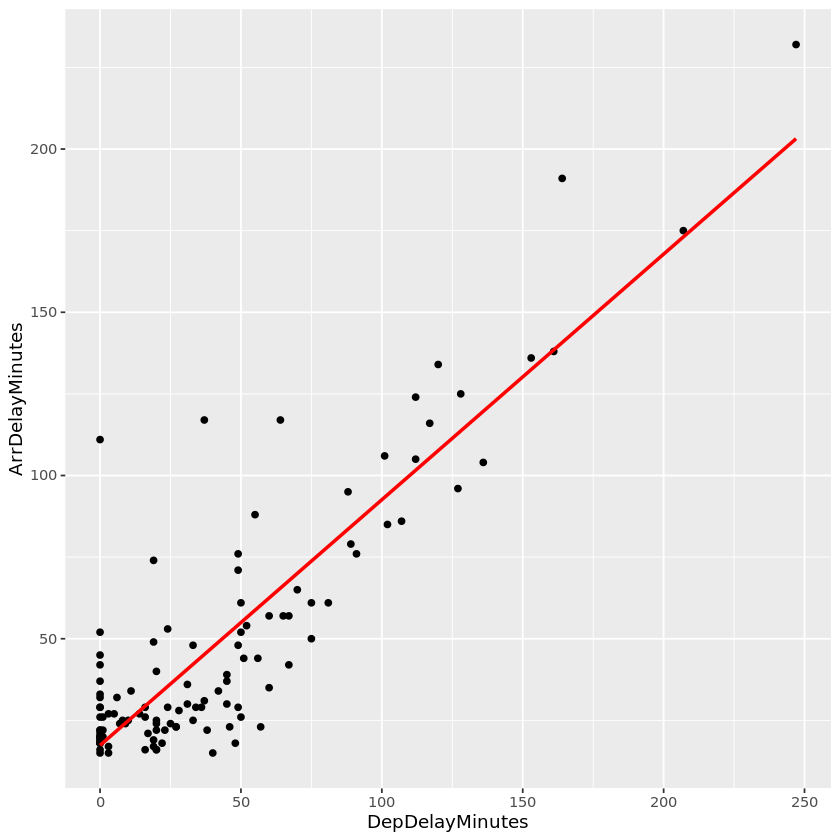

In [29]:
# Usamos o gráfico para melhor visualizar nosso modelo
# Note que a uma relação linear entre as variáveis X e Y
ggplot(alaska, aes(x = DepDelayMinutes, y = ArrDelayMinutes)) + geom_point() + stat_smooth(method = "lm", col = "red", se = FALSE)

`geom_smooth()` using formula 'y ~ x'


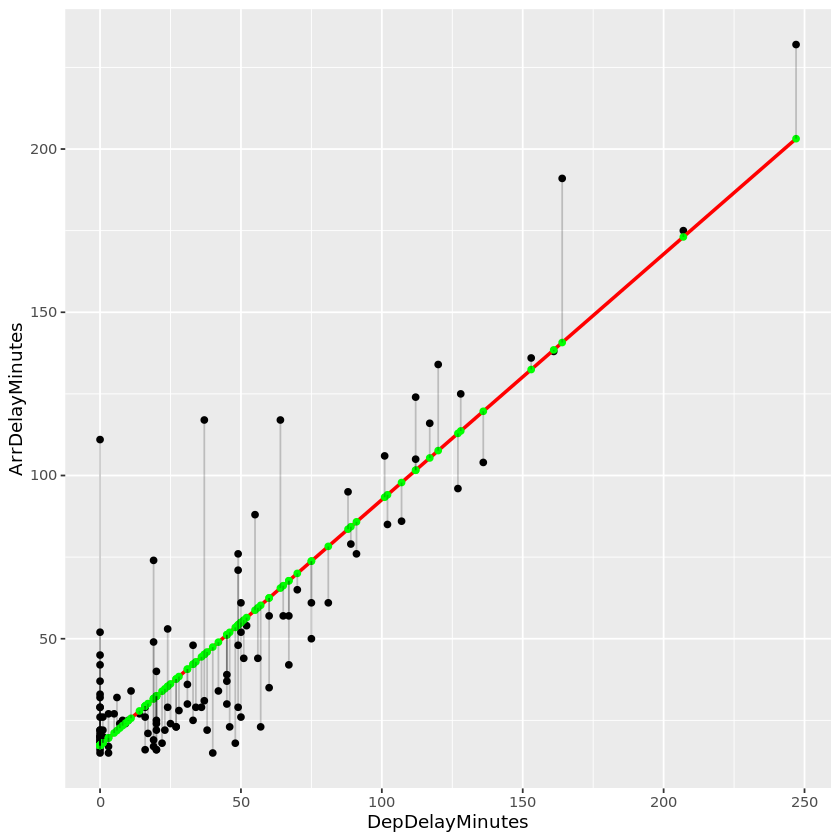

In [31]:
# Vamos adicionar os valores previstos para o dataset
alaska$predicao <- predict(modelo_linear)
    ggplot(alaska, aes(x = DepDelayMinutes, y = ArrDelayMinutes)) + 
# Plotar os pontos
    geom_point() + 
# Plotar a linha de regressão
    stat_smooth(method = "lm", col = "red", se = FALSE) +
# Adicionamos os valore previstos
    geom_point(aes(y = predicao), color = "green") +
# Conectamos o melhor ajuste com os dados usados para o treino
    geom_segment(aes(xend = DepDelayMinutes, yend = predicao), alpha = .2)